# **SMS SPAM DETECTION**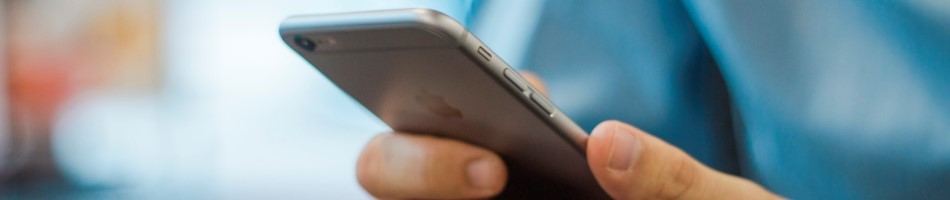

**IMPORTING LIBRARIES AND LOADING THE DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**GIVING NAMES TO THE COLUMNS**

In [ ]:
data.columns=["Type","SMS","Unknown1","Unknown2","Unknown3"]
data.head()

,Type,SMS,Unknown1,Unknown2,Unknown3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**THE DIMENSIONS**

In [ ]:
data.shape

(5572, 5)

**SOME INFORMATIONS OF THE DATA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      5572 non-null   object
 1   SMS       5572 non-null   object
 2   Unknown1  50 non-null     object
 3   Unknown2  12 non-null     object
 4   Unknown3  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**CHECKING FOR MISSING VALUES**

In [ ]:
data.isna().sum()

Type           0
SMS            0
Unknown1    5522
Unknown2    5560
Unknown3    5566
dtype: int64

**The columns Type and Mail have zero null values while the other 3 Columns have a very few non null values.**

**removing "Unknown1" ,"Unknown2" and "Unknown3"**

In [ ]:
data.drop(["Unknown1","Unknown2","Unknown3"],axis=1,inplace=True)
data.head()

,Type,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**CHECKING FOR DUPLICATE VALUES**

In [ ]:
data.duplicated().sum()

403

* **Duplicate values found**
*  **removing duplicate values**

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(5169, 2)

**TARGET ANALYSIS**

In [ ]:
data["Type"].unique()
# Type consist of 2 categories : ham and spam

array(['ham', 'spam'], dtype=object)

In [ ]:
data['Type'].value_counts()
# there seem to be some imbalance in the data

Type
ham     4516
spam     653
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

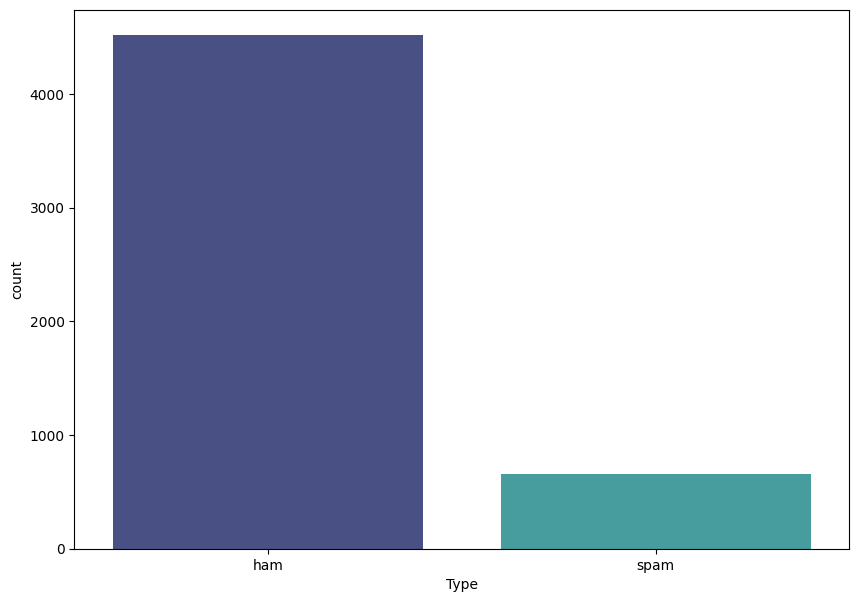

In [ ]:
# Visualizing the Target Variable
plt.figure(figsize=(10,7))
sns.countplot(x='Type',data=data,hue='Type',palette ='mako')

**CLEANING SMS TO CREATE WORD CLOUD**

In [ ]:
data["lower"]=data.SMS.str.lower() #lowercase
data["lower"]=[str(i) for i in data.lower] #converting all to string
data["lower"]=data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #removing special Characters

In [ ]:
data.head()

,Type,SMS,lower
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only i...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...


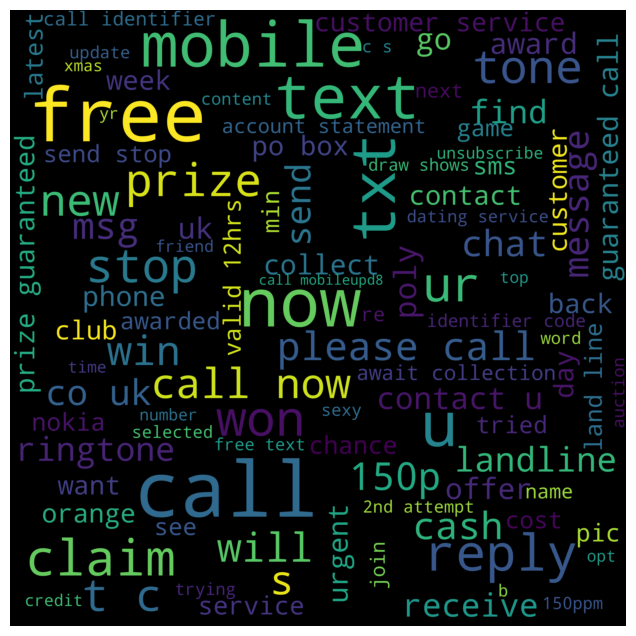

In [ ]:
# WORD CLOUD FOR SPAM SMS

from wordcloud import WordCloud
word_cloud_text = ''.join(data[data['Type']=='spam'].lower)
#Creation of wordcloud
wordcloud = WordCloud( max_font_size=100,max_words=100,background_color="black",scale=10,width=800,height=800).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

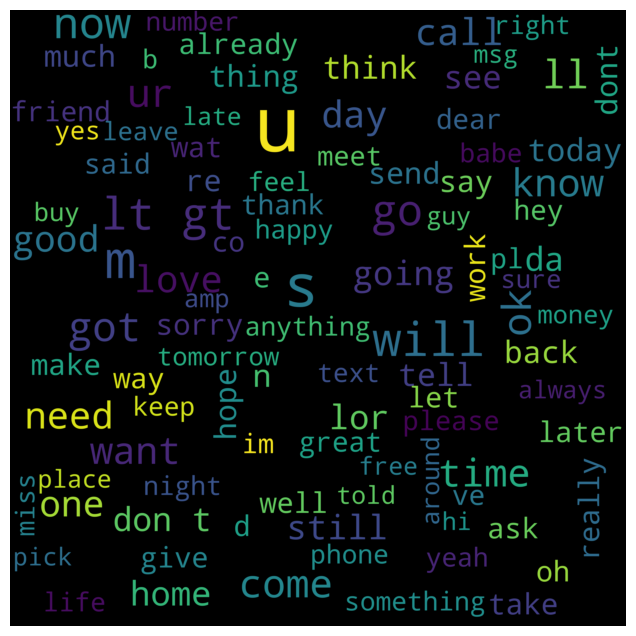

In [ ]:
# WORD CLOUD FOR HAM SMS

from wordcloud import WordCloud
word_cloud_text = ''.join(data[data['Type']=='ham'].lower)
#Creation of wordcloud
wordcloud = WordCloud( max_font_size=100,max_words=100,background_color="black",scale=10,width=800,height=800).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# LABELLING CATEGORICAL VALUES IN TYPE INTO NUMERICAL FORMAT

data['Type']=data['Type'].map({'ham':0,'spam':1})
data

,Type,SMS,lower
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only i...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,will b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other sug...
5570,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i d...


In [ ]:
data.dtypes

Type      int64
SMS      object
lower    object
dtype: object

**TEXT PREPROCESSING**

In [ ]:
# DOWNLOADING NECCESSARY PACKAGES

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# IMPORTING ITEMS FOR TEXT PROCESSING

from nltk.corpus import stopwords
from nltk import TweetTokenizer
from os.path import join
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tk = TweetTokenizer()
stemmer = SnowballStemmer('english')
sw = stopwords.words('english')
vec = TfidfVectorizer()

In [ ]:
sms=data.SMS
sms

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: SMS, Length: 5169, dtype: object

In [ ]:
# TOKENIZATION

sms=sms.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
sms

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: SMS, Length: 5169, dtype: object

In [ ]:
#SPECIAL CHARACTER REMOVAL

sms=sms.str.replace('[^a-zA-Z0-9]+',' ')
sms

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: SMS, Length: 5169, dtype: object

In [ ]:
# REMOVING SHORT WORDS

sms=sms.apply(lambda x:' '.join([w for  w in word_tokenize(x) if len(w)>3]))
sms

0       until jurong point crazy Available only bugis ...
1                                                  Joking
2       Free entry wkly comp final tkts 21st 2005 Text...
3                                      early already then
4                     think goes lives around here though
                              ...                        
5567    This time have tried contact have Pound prize ...
5568                            Will going esplanade home
5569                     Pity mood that other suggestions
5570    some bitching acted like interested buying som...
5571                                       Rofl true name
Name: SMS, Length: 5169, dtype: object

In [ ]:
# STEMMING

sms=sms.apply(lambda x: ' '.join([stemmer.stem(i.lower()) for i in tk.tokenize(x)]))
sms

0       until jurong point crazi avail onli bugi great...
1                                                    joke
2       free entri wkli comp final tkts 21st 2005 text...
3                                      earli alreadi then
4                       think goe live around here though
                              ...                        
5567    this time have tri contact have pound prize cl...
5568                                will go esplanad home
5569                         piti mood that other suggest
5570    some bitch act like interest buy someth els ne...
5571                                       rofl true name
Name: SMS, Length: 5169, dtype: object

In [ ]:
# STOP-WORD REMOVAL

sms=sms.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
sms

0       jurong point crazi avail onli bugi great world...
1                                                    joke
2       free entri wkli comp final tkts 21st 2005 text...
3                                           earli alreadi
4                            think goe live around though
                              ...                        
5567    time tri contact pound prize claim easi call 0...
5568                                     go esplanad home
5569                                    piti mood suggest
5570    bitch act like interest buy someth els next we...
5571                                       rofl true name
Name: SMS, Length: 5169, dtype: object

In [ ]:
# VECTORIZATION

x=vec.fit_transform(sms)

In [ ]:
# DIMENSIONS OF THE VECTORIZED SMS

x.shape

(5169, 6323)

In [ ]:
print(x)

  (0, 884)	0.37753922293414244
  (0, 1594)	0.3184501310755701
  (0, 1373)	0.36025677146467605
  (0, 6202)	0.2635569262292826
  (0, 2741)	0.21036993390436756
  (0, 1375)	0.3184501310755701
  (0, 4079)	0.18298949588895905
  (0, 1058)	0.2889055851462839
  (0, 1789)	0.29165646022077646
  (0, 4353)	0.25804943511862166
  (0, 3232)	0.37753922293414244
  (1, 3206)	1.0
  (2, 76)	0.3016094356216491
  (2, 951)	0.2093965917627499
  (2, 4596)	0.2093965917627499
  (2, 4555)	0.21055098634892547
  (2, 4629)	0.2004627267466403
  (2, 679)	0.28780278953769095
  (2, 5562)	0.14601019460184328
  (2, 384)	0.28780278953769095
  (2, 392)	0.28780278953769095
  (2, 5667)	0.28780278953769095
  (2, 2426)	0.2093965917627499
  (2, 1680)	0.24356041216397614
  (2, 6173)	0.2468058552229278
  :	:
  (5164, 4396)	0.29614969830184407
  (5164, 1421)	0.15603284138441495
  (5164, 1599)	0.2342037683563607
  (5164, 4469)	0.2447652330684342
  (5164, 4079)	0.20079906703212855
  (5165, 2264)	0.7817835348926222
  (5165, 2671)	0.439

In [ ]:
y=data.Type.values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# TRAIN AND TEST PARTITION

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# MODEL CREATION AND PERFORMANCE EVALUTAION

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report
Nb_model = MultinomialNB()
log_model = LogisticRegression(C=1, solver="liblinear",max_iter=200)
svm_model = LinearSVC()
a_models = [Nb_model,log_model,svm_model]

In [ ]:
for i in a_models:
  print("Model:",i)
  print('-'*150)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("predicted values:",y_pred)
  score=accuracy_score(y_test,y_pred)
  print("Accuracy score:",score)
  print("Model Evaluation Result:")
  print(classification_report(y_test,y_pred))
  print("="*150)

Model: MultinomialNB()
------------------------------------------------------------------------------------------------------------------------------------------------------
predicted values: [0 0 0 ... 1 0 0]
Accuracy score: 0.9574468085106383
Model Evaluation Result:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       889
           1       1.00      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Model: LogisticRegression(C=1, max_iter=200, solver='liblinear')
------------------------------------------------------------------------------------------------------------------------------------------------------
predicted values: [0 0 0 ... 1 0 0]
Accuracy score: 0.9458413926499033
Model Evaluation Result:
              precision    recall  f1-score   support

           0       0.95      0.99   